In [10]:
import numpy as np
import pandas as pd
from scipy.io import mmread
import matplotlib.pyplot as plt
from tifffile import imread
import os
from scipy.stats import zscore
from sklearn.metrics import pairwise_distances
from scipy.optimize import linear_sum_assignment
from scipy.stats import pearsonr, spearmanr
from tqdm import tqdm
import seaborn as sns
#from utils import ids_to_table, plot_correlations, save_matches, filter_matches, corr_dist, get_correlations
import pickle

In [11]:
def ids_to_table(ids, table):
    match_table = table[table['CellID'].isin(ids)] # get relevant rows
    df1 = match_table.set_index('CellID')
    match_table = df1.reindex(ids) # set new table in correct order
    return match_table

def get_correlations(markers, immune_table, tumor_table):
    correlations = []
    for i,s in enumerate(markers):
        correlations.append(spearmanr(immune_table[s],tumor_table[s])[0])
    return correlations

# marker names for immune, tumor, and their overlap
immune_markers = ['DNA_1','CD3', 'PDL1', 'GRZB','Ki67', 'PanCK', 'CD45','CD68', 'CD3d', 'CD8a',
             'CD163', 'aSMA', 'CD14','CD4', 'FOXP3', 'PDL1_2','CD11b', 'pRB', 'PD1',
             'LaminABC', 'PDL1_3', 'LAG3','CD20', 'HLA_A', 'MHC_II_DPB1']
tumor_markers = ['DNA_1','CD3', 'pERK', 'Rad51','CCND1', 'Vimentin', 'aSMA','Ecad', 'ER', 'PR',
            'EGFR', 'pRB', 'HER2','Ki67', 'CD45', 'p21','CK14','CK19', 'CK17',
            'LaminABC', 'AR', 'H2Ax','PCNA','PanCK', 'CD31']
shared_markers = ['DNA_1','CD3','aSMA','pRB','PanCK','CD45','Ki67','LaminABC']

In [12]:
radii = [i*0.65 for i in range(501)][1::3]
path = '/home/groups/ChangLab/heussner/tma-integration/results/Radius_exploration'
c = 'B3'
with open(os.path.join(path,f'sla_random_spearman_{c}.pkl'),'rb') as handle:
    sla_random = np.array(pickle.load(handle))

sla_random_mean = np.mean(sla_random, axis=0)[1::3]
sla_random_std = np.std(sla_random, axis=0)[1::3]

with open(os.path.join(path,f'sla_track_spearman_{c}.pkl'),'rb') as handle:
    sla_track = pickle.load(handle)[1::3]

with open(os.path.join(path,f'sla_all_spearman_{c}.pkl'),'rb') as handle:
    sla_all = pickle.load(handle)[1::3]

with open(os.path.join(path,f'la_all_spearman_{c}.pkl'),'rb') as handle:
    no_constraints = pickle.load(handle)

/tmp/ipykernel_3069809/844482676.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


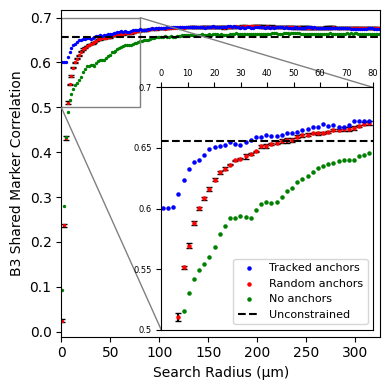

In [13]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax = plt.subplots(1,figsize=(4,4))
ax.scatter(radii, sla_track, color='blue', label='Tracked anchors',s=2,zorder=2)
ax.scatter(radii, sla_random_mean, color='red',label='Random anchors',s=2,zorder=1)
ax.scatter(radii, sla_all, color='green',label='No anchors',s=2)
ax.axhline(no_constraints, color='black',linestyle='--',label='Unconstrained')
ax.errorbar(radii, sla_random_mean, yerr=sla_random_std,fmt="none",ecolor='black',capsize=2,zorder=0)
ax.set_xlabel(u'Search Radius (\u03bcm)')
ax.set_ylabel(f'{c} Shared Marker Correlation')
ax.set_xticks([j*50 for j in range(7)])
ax.set_xlim([0,500*0.65])

axins = zoomed_inset_axes(ax, 2.7, loc=4)
axins.scatter(radii, sla_track, color='blue', label='Tracked anchors',s=5,zorder=2)
axins.scatter(radii, sla_random_mean, color='red',label='Random anchors',s=5,zorder=1)
axins.scatter(radii, sla_all, color='green',label='No anchors',s=5)
axins.errorbar(radii, sla_random_mean, yerr=sla_random_std,fmt="none",ecolor='black',capsize=2,zorder=0)
axins.axhline(no_constraints, color='black',linestyle='--',label='Unconstrained')
x1, x2, y1, y2 = 0, 77, 0.5, 0.7
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks([i*10 for i in range(9)],[i*10 for i in range(9)],fontsize=6)
axins.xaxis.tick_top()
axins.set_yticks([np.round(.5+i*.05,2) for i in range(5)],[np.round(.5+i*.05,2) for i in range(5)],fontsize=6)

mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
axins.legend(loc='lower right',fontsize=8)
plt.tight_layout()
plt.savefig('tracking_justification_main.svg')
plt.show()

In [8]:
sla_random_mean

array([0.02495597, 0.23676776, 0.43154214, 0.51039505, 0.55143203,
       0.56951351, 0.58805476, 0.6003012 , 0.60849939, 0.61602282,
       0.62395361, 0.62978676, 0.63295643, 0.6362405 , 0.63977888,
       0.64121041, 0.64298339, 0.6452613 , 0.64736924, 0.65132955,
       0.65163242, 0.6534026 , 0.65433573, 0.65548968, 0.65630774,
       0.65683621, 0.65937363, 0.66050921, 0.66094784, 0.66199579,
       0.66205648, 0.66255193, 0.66311413, 0.66463931, 0.66507202,
       0.66583977, 0.66588752, 0.66673398, 0.66829208, 0.6701275 ,
       0.67049335, 0.67084495, 0.67182268, 0.67205303, 0.67259817,
       0.67327567, 0.67395925, 0.67486851, 0.67461232, 0.67484694,
       0.67614735, 0.67611149, 0.67567539, 0.67625161, 0.67527318,
       0.67657119, 0.67646908, 0.67693575, 0.6767924 , 0.67764538,
       0.67770828, 0.67869737, 0.6782329 , 0.6782253 , 0.67784303,
       0.67876952, 0.67942335, 0.67889884, 0.67877046, 0.67823713,
       0.67871345, 0.67800964, 0.67799003, 0.67806539, 0.67813

In [9]:
sla_random_std

array([0.00291879, 0.00385391, 0.00359858, 0.00306837, 0.00159781,
       0.00184757, 0.00135395, 0.00138471, 0.0012767 , 0.00140919,
       0.00145078, 0.00148159, 0.00133659, 0.00063631, 0.0005484 ,
       0.00045651, 0.00198181, 0.00082407, 0.00054116, 0.00128644,
       0.00152492, 0.00095118, 0.00121019, 0.00152674, 0.00179432,
       0.00159641, 0.00116027, 0.00111597, 0.00137034, 0.00058967,
       0.00097825, 0.00095344, 0.00110546, 0.00100418, 0.0010007 ,
       0.00160849, 0.00174966, 0.00165238, 0.0010127 , 0.00098517,
       0.00166297, 0.00151414, 0.00158251, 0.0018298 , 0.00144261,
       0.00099706, 0.00070484, 0.00080746, 0.00117682, 0.00144684,
       0.00162128, 0.00167674, 0.00122554, 0.00114582, 0.00143294,
       0.00189589, 0.00219093, 0.00118568, 0.00105545, 0.00113769,
       0.00187345, 0.00115854, 0.00106857, 0.00097346, 0.00116393,
       0.00096568, 0.0006649 , 0.00172611, 0.00197532, 0.00187924,
       0.00169159, 0.00200921, 0.00167472, 0.00224657, 0.00233

In [11]:
no_constraints

0.6559841056125153

In [ ]:
path = '/home/groups/ChangLab/heussner/tma-integration/data/nuc_cell_tables/'
tumor_all = pd.read_csv(os.path.join(path,f'{core}_tCyCIF_tumor_both.csv'))
immune_all = pd.read_csv(os.path.join(path,f'{core}_tCyCIF_immune_both.csv'))

immune_all_sample = immune_all.copy()
# load matrices

immune = immune_all_sample[shared_markers].copy()
tumor = tumor_all[shared_markers].copy()

immune = zscore(immune,axis=0)
tumor = zscore(tumor,axis=0)
cdist = 1 - spearmanr(a=immune.to_numpy(),
                 b=tumor.to_numpy(), 
                 axis=1)[0][0:len(immune),len(immune):len(immune)+len(tumor)]

rows, cols = linear_sum_assignment(cdist)
scores = np.array([cdist[i, j] for i, j in zip(rows, cols)])
matching_table = pd.DataFrame(data={'immune':immune_all_sample['CellID'], 'tumor': [tumor_all['CellID'].iloc[c] for c in cols], 'score':scores})
imtbl = ids_to_table(matching_table['immune'],immune_all_sample)
tmtbl = ids_to_table(matching_table['tumor'],tumor_all)
sla_all = np.mean(get_correlations(shared_markers, imtbl,tmtbl))

In [36]:
core = 'B3'
path = '/home/groups/ChangLab/heussner/tma-integration/data/nuc_cell_tables/'
tumor_all = pd.read_csv(os.path.join(path,f'{core}_tCyCIF_tumor_both.csv'))
immune_all = pd.read_csv(os.path.join(path,f'{core}_tCyCIF_immune_both.csv'))

immune_all_sample = immune_all.copy()
# load matrices

immune = immune_all_sample[shared_markers].copy()
tumor = tumor_all[shared_markers].copy()

immune = zscore(immune,axis=0)
tumor = zscore(tumor,axis=0)
cdist = 1 - spearmanr(a=immune.to_numpy(),
                 b=tumor.to_numpy(), 
                 axis=1)[0][0:len(immune),len(immune):len(immune)+len(tumor)]
sla_all = []
radii = [200]
xdist = cdist.copy()
for r in tqdm(radii):
    #spearman correlation distance
    #cdist = 1 - spearmanr(a=immune.to_numpy(),
    #             b=tumor.to_numpy(), 
    #             axis=1)[0][0:len(immune),len(immune):len(immune)+len(tumor)]
    #euclidean distance between target cells
    cols = ['x','y']
    tumor_spatial = tumor_all[cols].to_numpy()
    immune_spatial = immune_all_sample[cols].to_numpy()
    sdist = pairwise_distances(immune_spatial, tumor_spatial)
    dist = np.where(sdist<=r, cdist.copy(), 10000000)
    rows, cols = linear_sum_assignment(dist)
    scores = np.array([cdist[i, j] for i, j in zip(rows, cols)])
    print(np.sum(scores))
    matching_table = pd.DataFrame(data={'immune':immune_all_sample['CellID'], 'tumor': [tumor_all['CellID'].iloc[c] for c in cols], 'score':scores})
    imtbl = ids_to_table(matching_table['immune'],immune_all_sample)
    tmtbl = ids_to_table(matching_table['tumor'],tumor_all)
    sla_all.append(np.mean(get_correlations(shared_markers, imtbl,tmtbl)))

100%|███████████████████████████████████████████| 1/1 [00:22<00:00, 22.97s/it]

2349.738095238094


In [37]:
path = '/home/groups/ChangLab/heussner/tma-integration/data/nuc_cell_tables/'
tumor_all = pd.read_csv(os.path.join(path,f'{core}_tCyCIF_tumor_both.csv'))
immune_all = pd.read_csv(os.path.join(path,f'{core}_tCyCIF_immune_both.csv'))

immune_all_sample = immune_all.copy()
# load matrices

immune = immune_all_sample[shared_markers].copy()
tumor = tumor_all[shared_markers].copy()

immune = zscore(immune,axis=0)
tumor = zscore(tumor,axis=0)
cdist = 1 - spearmanr(a=immune.to_numpy(),
                 b=tumor.to_numpy(), 
                 axis=1)[0][0:len(immune),len(immune):len(immune)+len(tumor)]

rows, cols = linear_sum_assignment(cdist)
scores = np.array([cdist[i, j] for i, j in zip(rows, cols)])
print(np.sum(scores))
matching_table = pd.DataFrame(data={'immune':immune_all_sample['CellID'], 'tumor': [tumor_all['CellID'].iloc[c] for c in cols], 'score':scores})
imtbl = ids_to_table(matching_table['immune'],immune_all_sample)
tmtbl = ids_to_table(matching_table['tumor'],tumor_all)
sla_all = np.mean(get_correlations(shared_markers, imtbl,tmtbl))

1518.7142857142844


In [23]:
sla_all

0.6559841056125153